In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
vorp=pd.read_csv('nba_players_adv.csv')
stats=pd.read_csv('nba_other_stats.csv')

In [264]:
vorp=vorp.merge(stats,left_on='Link',right_on='link')
vorp.drop(columns='link',inplace=True)
vorp.drop(columns='\\',inplace=True)

<AxesSubplot:xlabel='Age', ylabel='VORP'>

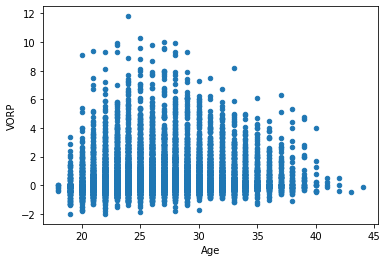

In [267]:
vorp.plot.scatter('Age','VORP')

In [268]:
not_all_years=pd.DataFrame(index=vorp['Link'].unique(),columns=['to_exclude'])
not_all_years['to_exclude']=0

for i in vorp['Link'].unique():
    df=vorp[vorp['Link']==i]
    if len(df)<df.iloc[0,33]:
        not_all_years.loc[i,'to_exclude']=1
    if df.iloc[len(df)-1,3]<30:
        not_all_years.loc[i,'to_exclude']=1
    continue

In [269]:
not_all_years.reset_index(inplace=True)

vorp=vorp.merge(not_all_years,how='left',left_on='Link',right_on='index')

In [270]:
vorp_quint=vorp[vorp['to_exclude']==0].copy()
vorp_quint.reset_index(drop=True,inplace=True)

In [271]:
vorp_quint['link_id']=vorp_quint['Link']+vorp_quint['year']

peak=pd.DataFrame(index=vorp_quint['link_id'].unique(),columns=['is_peak','peak_age'])
peak['is_peak']=0
peak['peak_age']='No'

for i in vorp_quint['Link'].unique():
    df=vorp_quint[vorp_quint['Link']==i]
    idx=df['VORP'].idxmax()
    peak.loc[vorp_quint.loc[idx,'link_id'],'is_peak']=1
    peak.loc[vorp_quint.loc[idx,'link_id'],'peak_age']=df.loc[idx,'Age']

In [272]:
peak.reset_index(inplace=True)

In [273]:
vorp_quint=vorp_quint.merge(peak,how='left',left_on='link_id',right_on='index')

In [274]:
vorp_peaks=vorp_quint[vorp_quint['is_peak']==1]

In [275]:
q1=vorp_peaks['VORP'].quantile(q=0.2)
q2=vorp_peaks['VORP'].quantile(q=0.4)
q3=vorp_peaks['VORP'].quantile(q=0.6)
q4=vorp_peaks['VORP'].quantile(q=0.8)

In [276]:
print(q1)
print(q2)
print(q3)
print(q4)

0.4
1.1
1.9
3.0


In [277]:
vorp_peaks['group']=vorp_peaks['VORP'].apply(lambda x: 1 if x<=q1 else 2 if x<=q2 else 3 if x<=q3 else 4 if x<=q4 else 5)

C:\Users\marli\AppData\Local\Temp\ipykernel_1332\639019981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vorp_peaks['group']=vorp_peaks['VORP'].apply(lambda x: 1 if x<=q1 else 2 if x<=q2 else 3 if x<=q3 else 4 if x<=q4 else 5)


In [278]:
vorp_peaks.groupby('group').mean()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,WS,WS/48,OBPM,DBPM,BPM,VORP,birth_year,exp,to_exclude,is_peak
group,,,,,,,,,,,,,,,,,,,,,
1,27.654762,39.654762,686.916667,11.563095,0.503702,0.254083,0.307190,6.315476,13.286905,9.815476,...,1.323810,0.064762,-2.205952,-0.158333,-2.353571,0.126190,1981.821429,5.940476,0.0,1.0
2,26.571429,71.896104,1636.740260,14.810390,0.561156,0.248338,0.285558,6.158442,14.935065,10.535065,...,3.844156,0.118727,-0.072727,0.250649,0.172727,0.810390,1983.857143,9.064935,0.0,1.0
3,26.670455,75.034091,2088.500000,15.369318,0.571614,0.315830,0.281807,4.709091,14.123864,9.415909,...,5.273864,0.123261,0.652273,0.278409,0.920455,1.487500,1984.545455,10.897727,0.0,1.0
4,26.452055,75.671233,2265.000000,17.731507,0.581411,0.302753,0.283438,5.243836,15.082192,10.189041,...,7.032877,0.151452,1.908219,0.471233,2.379452,2.460274,1984.863014,12.315068,0.0,1.0
5,26.184211,77.171053,2741.776316,22.190789,0.581013,0.229724,0.378974,5.205263,16.865789,11.071053,...,10.751316,0.187882,4.119737,0.919737,5.031579,4.894737,1984.710526,13.618421,0.0,1.0


In [279]:
vorp_peaks.groupby('group').count()

,Player,Link,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,college,recruiting_rank,draft,exp,index_x,to_exclude,link_id,index_y,is_peak,peak_age
group,,,,,,,,,,,,,,,,,,,,,
1,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
2,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
3,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
4,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
5,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76


In [280]:
# All ability levels peak between 26 and 27

In [281]:
# Age labels

In [282]:
vorp['MPG']=vorp['MP']/vorp['G']

In [283]:
def career_stage(df):
    if df['Age'] > 27:
        return 'Past Prime'
    elif df['Age']<=27 and df['G']>=40 and df['MPG']>=15:
        return 'Improving Role Player'
    else:
        return 'Improving End-of-Bench'

In [284]:
vorp['Career stage']=vorp.apply(career_stage,axis=1)

In [285]:
vorp.sort_values(by=['Link','year'],inplace=True)
vorp.reset_index(drop=True,inplace=True)

In [286]:
exp=pd.DataFrame(index=range(len(vorp['Link'])),columns=['exp'])
exp['exp']=0

for i in vorp['Link'].unique():
    df=vorp[vorp['Link']==i]
    k=0
    for j in range(len(df),0,-1):
        exp.loc[df.iloc[j-1,:].name,'exp']=df.iloc[j-1,33]-k
        k+=1

In [287]:
vorp['exp']=exp['exp']

In [288]:
recruiting_ranks=pd.read_csv('recruiting_ranks.csv')

In [289]:
recruiting_ranks=recruiting_ranks[['RSCI', 'Player', 'Draft', 'Rd', 'Pk', 'College','year']]

In [290]:
recruiting_ranks['RSCI'] = recruiting_ranks['RSCI'].apply(pd.to_numeric, errors='coerce')
recruiting_ranks['Draft'] = recruiting_ranks['Draft'].apply(pd.to_numeric, errors='coerce')
recruiting_ranks['year'] = recruiting_ranks['year'].apply(pd.to_numeric, errors='coerce')

In [291]:
final_rank=pd.DataFrame(index=recruiting_ranks['Player'].unique(),columns=['rank','draft','year'])

for i in recruiting_ranks['Player']:
    df=recruiting_ranks[recruiting_ranks['Player']==i]
    final_rank.loc[i,'rank']=df.iloc[len(df)-1,0]
    final_rank.loc[i,'draft']=df.iloc[len(df)-1,2]
    final_rank.loc[i,'year']=df.iloc[len(df)-1,6]

In [292]:
final_rank.reset_index(drop=False,inplace=True)

In [293]:
final_rank.rename(columns={'index':'Player'},inplace=True)

In [294]:
final_rank['Player']=final_rank['Player'].apply(lambda x: x.upper())

In [295]:
vorp['Player']=vorp['Player'].apply(lambda x: x.upper())

In [296]:
vorp=vorp.merge(final_rank[['Player','rank']],left_on='Player',right_on='Player',how='left')

In [297]:
vorp.drop(columns='recruiting_rank',inplace=True)
vorp.rename(columns={'rank':'recruiting_rank'},inplace=True)

In [298]:
colleges=pd.read_csv('colleges_final.csv',encoding='ISO-8859-1')

In [299]:
colleges['school']=colleges['school'].apply(lambda x: x.upper())

vorp['college']=vorp['college'].apply(lambda x: x.upper())

vorp=vorp.merge(colleges[['school','division']],left_on='college',right_on='school',how='left')

In [300]:
vorp.drop(columns='school',inplace=True)

In [301]:
vorp.loc[(vorp['division'].isnull()) & (vorp['recruiting_rank'].isnull()), 'division'] = 'Europe'

In [302]:
vorp['division'].fillna('High School',inplace=True)

In [303]:
vorp['recruiting_rank'].fillna('no rank',inplace=True)

In [304]:
vorp['draft'] = vorp['draft'].apply(pd.to_numeric, errors='coerce')

In [305]:
vorp['recruiting_rank'].replace(['no rank'], 101,inplace=True)
vorp['draft'].replace(['undrafted'], 61,inplace=True)

In [306]:
vorp['rank_labels']=vorp['recruiting_rank'].apply(lambda x: 'Top 20' if x<=20 else 'Mid' if x<=50 else 'Bottom' if x<=100 else x)
vorp['draft_labels']=vorp['draft'].apply(lambda x: 'Top 20' if x<=20 else 'Mid 20' if x<=40 else 'Bottom 20' if x<=60 else 'Bottom 20' if x==77 else x)
vorp['draft_round']=vorp['draft'].apply(lambda x: 1 if x<=30 else 2 if x<=77 else x)

In [307]:
vorp['rank_labels'].replace(101,'no rank',inplace=True)
vorp['draft'].fillna('undrafted',inplace=True)
vorp['draft_labels'].fillna('undrafted',inplace=True)
vorp['draft_round'].fillna('undrafted',inplace=True)

In [308]:
vorp.to_csv('nba_players_adv_other_stats.csv',index=False)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [19]:
# Quadratic regression
quadr=vorp_quint[['VORP','Age']]

In [20]:
quadr['Age2']=quadr['Age']**2

C:\Users\marli\AppData\Local\Temp\ipykernel_18568\4237062744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quadr['Age2']=quadr['Age']**2


In [21]:
model = np.poly1d(np.polyfit(quadr['Age'],quadr['VORP'], 2))

In [22]:
print(model)

           2
-0.006639 x + 0.3874 x - 4.965


In [23]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(quadr['Age'],quadr['VORP'], 2)

{'r_squared': 0.016387204064207534}

In [36]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
x=quadr['Age'].values.reshape(-1,1)
y=quadr['VORP']
x_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [37]:
model = LinearRegression().fit(x_2, y)

In [38]:
r_sq = model.score(x_2, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")


coefficient of determination: 0.016387204064207017
intercept: -4.964663081359862
coefficients: [ 0.38743163 -0.00663862]


In [39]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(x_2)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   VORP   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     55.16
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.74e-24
Time:                        12:30:39   Log-Likelihood:                -10800.
No. Observations:                6625   AIC:                         2.161e+04
Df Residuals:                    6622   BIC:                         2.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9647      0.621     -7.999      0.0